# 第7章 ニューラルネットワーク・ディープラーニング（2）
## 7.3 Kerasでニューラルネットワークモデル

cross entropy 0.28, accuracy 0.89
Calculation time : 7.037 sec


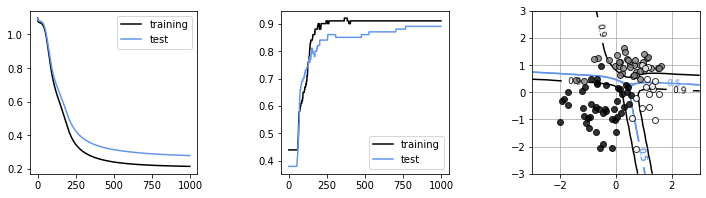

In [3]:
# リスト 7-2-(1)
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# データのload -------------------------------------
outfile = np.load('class_data.npz')
X_train=outfile['X_train']
T_train=outfile['T_train']
X_test=outfile['X_test']
T_test=outfile['T_test']
X_range0=outfile['X_range0']
X_range1=outfile['X_range1']

# リスト 7-2-(2)
# データの図示 -------------------------------------
def show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle='none', marker='o', markeredgecolor='black', color=c[i], alpha=0.8)
    plt.grid(True)

# リスト 7-2-(3)
# 乱数の初期化
np.random.seed(1)

# Sequentialモデルの作成 ---------------------------
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid', kernel_initializer='uniform'))
model.add(Dense(3, activation='softmax', kernel_initializer='uniform'))
sgd = optimizers.SGD(lr=0.5, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# 学習 ---------------------------------------------
startTime = time.time()
history = model.fit(X_train, T_train, epochs=1000, batch_size=100, verbose=0, validation_data=(X_test, T_test))

# モデル評価 ----------------------------------------
score = model.evaluate(X_test, T_test, verbose=0)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))
calculation_time = time.time() - startTime
print('Calculation time : {0:.3f} sec'.format(calculation_time))

# リスト 7-2-(4)
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# 学習曲線表示 --------------------------------------
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label='training')
plt.plot(history.history['val_loss'], 'cornflowerblue', label='test')
plt.legend()

# 精度表示 ------------------------------------------
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label='training')
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label='test')
plt.legend()

# 境界線表示 ----------------------------------------
plt.subplot(1, 3, 3)
show_data(X_test, T_test)
xn = 60 # 等高線表示の解像度
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
y = model.predict(x)
K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=['cornflowerblue', 'black'])
    cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()